# Домашнее задание №3. Нечеткая логика

### Задание

Усовершенствуйте систему вычисления чаевых, рассмотренную на семинаре. Добавляйте новые правила, изменяйте количество нечетких множеств, и попробуйте сделать более реалистичную систему.

Давайте реализуем пример, в котором посчитаем, сколько чаевых оставлять в ресторане, в зависимости от качества еды и качества обслуживания (конечно, это важно понимать для ресторанов, а не для посетителей, те и так знают).

Две входные переменные: качество обслуживания `service` и качество еды `quality`. Это не очень четко определенные понятия, сопоставим им нечеткие множества:
* Качество обслуживания `service`: элементы множеств: от 0 до 10, Множества: "плохое", "приемлемое", "замечательное" (poor, acceptable, amazing).
* Качество еды `quality`: элементы множеств: от 0 до 10, Множества: "отвратительное", "так_себе", "прекрасное" (bad, decent, great).

Выходная переменная `tip` - сколько чаевых оставить - тоже нечеткая: элементы множеств: от 0% до 25%, Множества: "немного", "средне", "много" (low, medium, high)

Надо составить правила, их может быть много, но мы ограничимся несколькими, примерно такого вида:
* ЕСЛИ  обслуживание было "плохое" ИЛИ еда была "отвратительна" ТОГДА чаевых "немного".
* ЕСЛИ  обслуживание было "так_себе" ТОГДА чаевых "средне".
* ЕСЛИ  обслуживание было "замечательное" И еда была "прекрасное" ТОГДА чаевых "много".
* и т.п.

В результате обработки правил получим ответ в виде нечеткого множества. Функция принадлежности результата показывает насколько сильно правило выполняется. Выберем правило (результат), которое сильнее всех выполняется, переведем его в четкий вид и окончательно узнаем уже в процентах, сколько чаевых оставить.

c:\Users\murza\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\murza\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


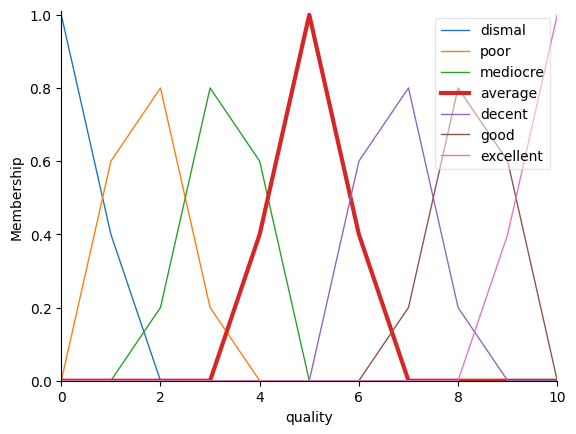

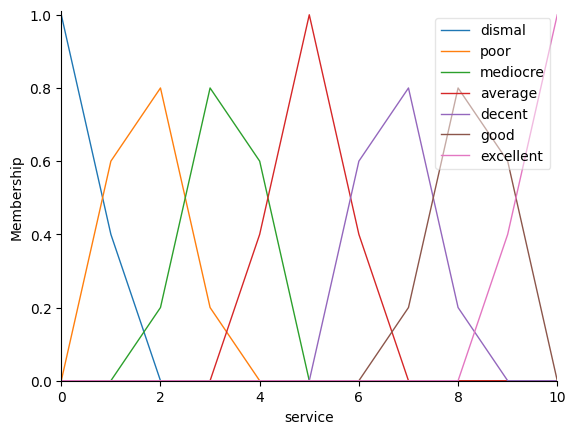

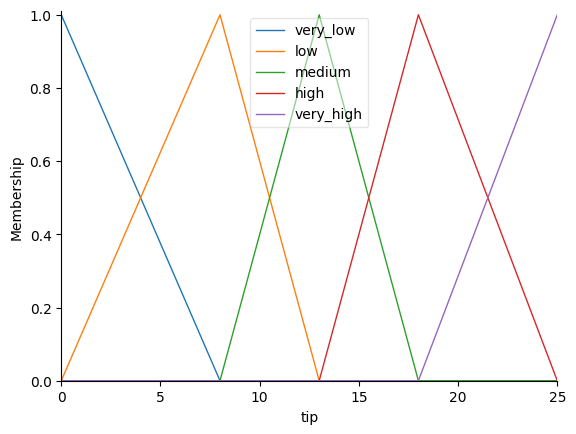

In [1]:
import numpy as np                       # подключаем numpy
import skfuzzy as fuzz                   # подключаем библиотеку skfuzzy
from skfuzzy import control as ctrl      # и модуль control для задания переменных и правил

# Зададим элементы для переменных - нечетких множеств
quality = ctrl.Antecedent( # качество еды. Antecedent - значит входные переменные
    np.arange(0, 11, 1), # перечисляем элементы от 0 до 10
    'quality') # название переменной - качество еды
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service') # качество обслуживания

# Выходная переменная - количество чаевых.
tip = ctrl.Consequent(# Consequent - значит результат, вывод, т.е. выходная переменная
    np.arange(0, 26, 1), # значения от 0 до 25 %
    'tip') # название

# Функции принадлежности можно задать автоматически (они будут треугольные),
# тогда библиотека сама подберет диапазоны, а мы укажем лишь количество нечетких множеств
quality.automf(7)
service.automf(7)
# Если задаем автоматически, то названия множеств потеряются, и будут использоваться автоматические названия

# Но можно и в ручную задавать функции принадлежности, давайте для выходной переменной зададим сами
# trimf задает треугольную функцию принадлежности, мы ей указываем
# tip.universe - перечисление всех элементов
# [0, 0, 13] - положения левого конца, вершины и правого конца треугольника
tip['very_low'] = fuzz.trimf(tip.universe, [0, 0, 8])
tip['low'] = fuzz.trimf(tip.universe, [0, 8, 13])
tip['medium'] = fuzz.trimf(tip.universe, [8, 13, 18])
tip['high'] = fuzz.trimf(tip.universe, [13, 18, 25])
tip['very_high'] = fuzz.trimf(tip.universe, [18, 25, 25])

# Метод .view() покажет функции принадлежности графически
quality['average'].view() # покажет все, но выделит множество 'average' (это, как мы помним, автоматическое название множества)
service.view() # покажет все
tip.view() # покажет все

In [2]:
# НЕЧЕТКИЕ ПРАВИЛА
""""
Зададим три правила, используя метод .Rule()
Сервис (обслуживание, service): dismal, poor, mediocre, average, decent, good, excellent
Еда (качество, quality): dismal, poor, mediocre, average, decent, good, excellent
Чаевые (tips): very_low, low, medium, high, very_high
"""
# rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
# rule2 = ctrl.Rule(service['average'], tip['medium'])
# rule3 = ctrl.Rule(service['good'] & quality['good'], tip['high'])

all_rules = [
    ctrl.Rule(quality['dismal'] | service['dismal'], tip['very_low']),
    ctrl.Rule(quality['poor'] | service['poor'], tip['low']),
    ctrl.Rule(quality['mediocre'] | service['mediocre'], tip['medium']),
    ctrl.Rule(quality['average'] & service['average'], tip['high']),
    ctrl.Rule(quality['decent'] & service['decent'], tip['high']),
    ctrl.Rule(quality['dismal'] & service['average'], tip['low']),
    ctrl.Rule(quality['poor'] & service['mediocre'], tip['low']),
    ctrl.Rule(quality['average'] & service['good'], tip['medium']),
    ctrl.Rule(quality['good'] & service['good'], tip['high']),
    ctrl.Rule(quality['excellent'] & service['excellent'], tip['very_high']),
    ctrl.Rule(quality['dismal'] | service['poor'], tip['very_low']),
    ctrl.Rule(quality['mediocre'] & service['decent'], tip['medium']),
    ctrl.Rule(quality['poor'] & service['average'], tip['low']),
    ctrl.Rule(quality['average'] & service['excellent'], tip['high']),
    ctrl.Rule(quality['good'] & service['excellent'], tip['very_high'])
]


In [3]:
# задав все переменные и правила, соберем их в единую систему методом ControlSystem()
# это название не просто так - подобные системы применяются для управления.
tipping_ctrl = ctrl.ControlSystem(all_rules)

# Созданная система управления абстрактна,
# давайте сделаем ее симулятор,
# который уже можно будет использовать для расчетов: ControlSystemSimulation()

tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Теперь можно просимулировать эту систему,
# зададим входы
tipping.input['quality'] = 6.5 # т.е. мы оценили качество еды на 6.5 из 10
tipping.input['service'] = 9.8 # т.е. мы оценили качество обслуживания на 9.8 из 10

# Рассчитаем систему правил с этими входами
tipping.compute() # обрабатываются все правила ....


print(tipping.output['tip']) # смотрим результат

# Итак, с такими оценками качества еды и обслуживания мы должны оставить ....% чаевых.
# Теперь ресторан будет примерно понимать, чего можно ожидать.

17.244224888261584


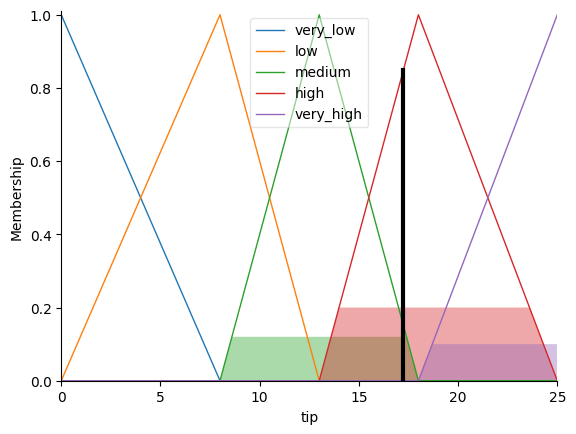

In [4]:
tip.view(sim=tipping) # посмотрим на результат
# Для каждого возможного выходного нечеткого множества посчитано,
# насколько сильно оно выполняется (уровень закрашивания)
# а для максимально подходящего (high, зеленое)
# проведена дефазификация - выбрано такое число, которое лучше всех представляет это множество
# конкретно здесь - дефазификация по центроиду, так, чтобы элементы справа от числа уравновешивали элементы слева от него.

18.742857142857147


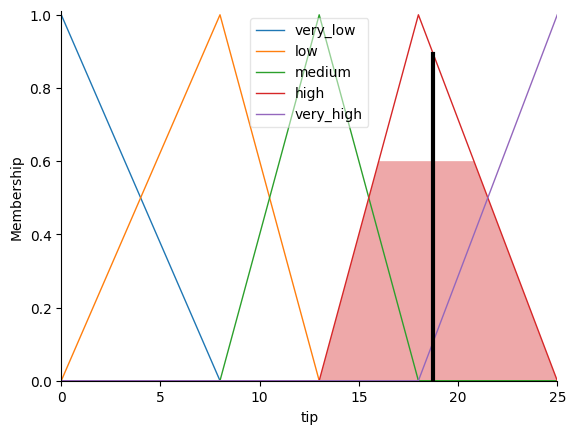

In [5]:
tipping.input['quality'] = 9 #
tipping.input['service'] = 8 #

# Рассчитаем систему правил с этими входами
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

8.076243093922653


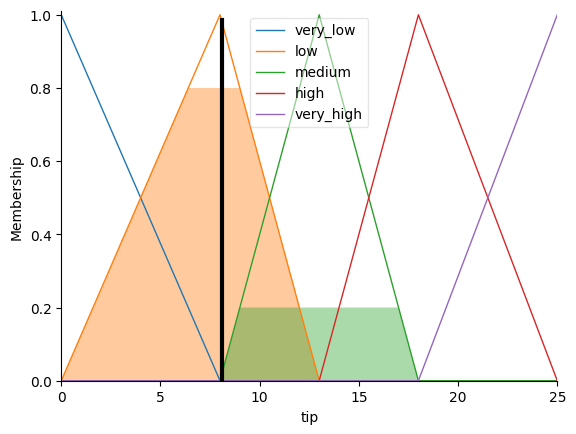

In [6]:
tipping.input['quality'] = 2 #
tipping.input['service'] = 5 #

# Рассчитаем систему правил с этими входами
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

2.666666666666667


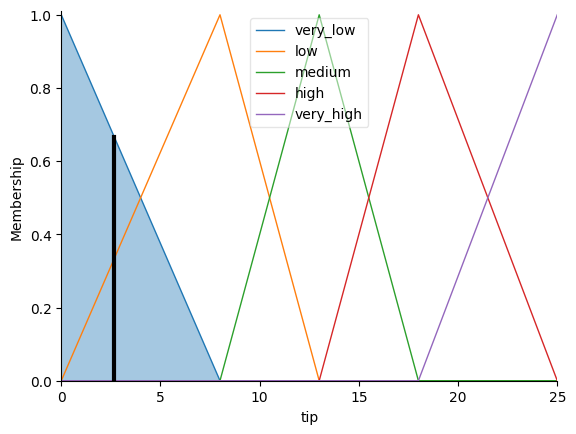

In [7]:
tipping.input['quality'] = 0 #
tipping.input['service'] = 0 #

# Рассчитаем систему правил с этими входами
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)